In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/BME-574-2024`


In [2]:
Pkg.add(["Plots"])

    Updating registry at `~/.julia/registries/JuliaComputingRegistry.toml`
    Updating registry at `~/.julia/registries/JuliaHubRegistry.toml`
   Resolving package versions...
  No Changes to `~/Documents/programming/BME-574-2024/Project.toml`
  No Changes to `~/Documents/programming/BME-574-2024/Manifest.toml`


In [3]:
using Plots

In [8]:
h = 0.5
xs = collect(-6:h:6)
ys = collect(-6:h:6)
X = [x for x = xs for _ = ys]
Y = [y for _ = xs for y = ys]

625-element Vector{Float64}:
 -6.0
 -5.5
 -5.0
 -4.5
 -4.0
 -3.5
 -3.0
 -2.5
 -2.0
 -1.5
 -1.0
 -0.5
  0.0
  ⋮
  0.5
  1.0
  1.5
  2.0
  2.5
  3.0
  3.5
  4.0
  4.5
  5.0
  5.5
  6.0

In [9]:
f0(x,y) = 1.5 - 1.0*exp(-0.03*(3*x^2+y^2))
Z = ((x,y) -> begin
        f0(x,y)
    end)

#7 (generic function with 1 method)

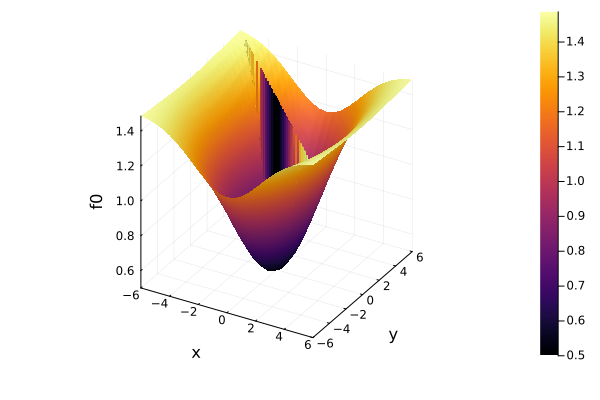

In [21]:
surface(X, Y, Z.(X,Y), xlabel = "x", ylabel = "y", zlabel = "f0")

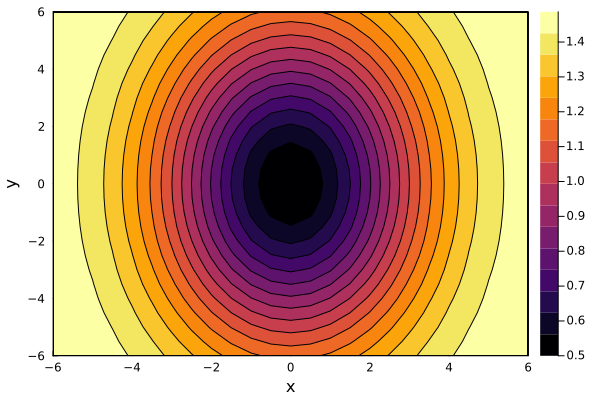

In [14]:
contourf(x, y, f0, xlabel = "x", ylabel = "y", zlabel = "f0")

In [19]:
f(x,y) = 1.5-1.6*exp(-0.05*(3*(x+3).^2+(y+3).^2))
fs(x,y) = f(x,y) + (0.5-exp(-0.1*(3*(x-3).^2+(y-3).^2)))

fs (generic function with 1 method)

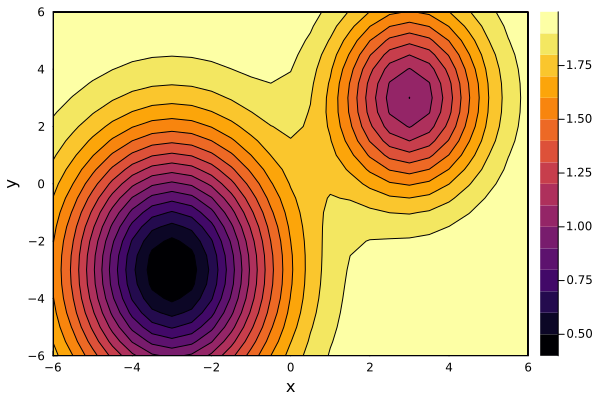

In [45]:
contourf(x, y, fs, xlabel = "x", ylabel = "y", zlabel = "f0",aspect=:equal)

In [22]:
# Gradient Decent
fquad(x,y) = x^2 + 3*y^2

fquad (generic function with 1 method)

In [46]:
xc = [3.0]
yc = [2.0]
fc = [fquad(3.0,2.0)]
for j in 1:10
    del = (xc[end]^2 + 9*yc[end]^2)/(2*xc[end] + 54*yc[end]^2)
    push!(xc,(1-2*del)*xc[end])
    push!(yc,(1-6*del)*yc[end])
    push!(fc,fquad(xc[end],yc[end]))

    if abs(fc[end]-fc[end-1])<1e-6
        break
    end
end

In [47]:
collect(zip(xc, yc))

11-element Vector{Tuple{Float64, Float64}}:
 (3.0, 2.0)
 (1.7837837837837835, -0.43243243243243246)
 (0.5137388832064905, 0.4912365861692354)
 (0.33571884365332627, -0.01943114421935184)
 (0.2230353037547772, 0.0001349613744421102)
 (0.1732905027900615, 4.4657822539913496e-5)
 (0.14326089581505838, 2.144148631303372e-5)
 (0.12273720918597388, 1.2226305643245116e-5)
 (0.10767278581724037, 7.7244374893187e-6)
 (0.09607935664805428, 5.2293023010393166e-6)
 (0.08684811369897824, 3.7220182700309583e-6)

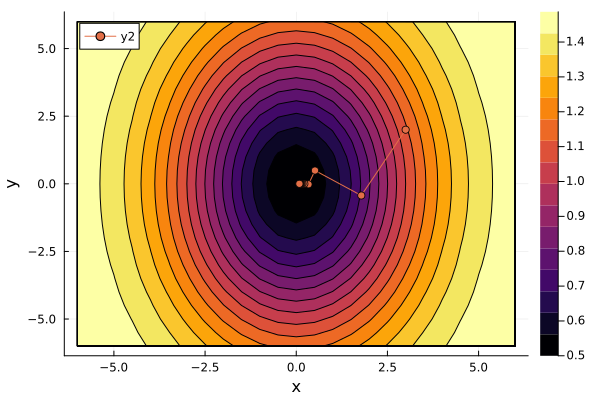

In [44]:
contourf(x, y, f0, xlabel = "x", ylabel = "y", zlabel = "f0")
plot!(xc, yc, markershape = :circle, aspect=:equal)